### Function to Approximate 
 $$ f_1(x) = cos(x),  \hspace{10 mm}     [0, \frac{\pi}{2}] $$



In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
from time import time

plt.rcParams.update({'font.size': 16})
from matplotlib import rcParams
pi = math.pi
linestyles=['solid', 'dashed', 'dashdot', 'dotted']
colors = ['r', 'b', 'k']

 ###  Python Functions Used for Fourier Analysis 
 Vectorize $a_n$ and $b_n$ functions for $f_1(x)$

In [2]:
def a_n(n):
    try:
        a = 0
    except ZeroDivisionError:
        a = 0
    return a

def b_n(n):
    b = 2/pi * (1/(2*n +1) + 1 / (2*n -1))
    return b 

def fourier(a_coeff, b_coeff, x_input, interval_length, a_0=0, ):
    
    total = 0
    y_output = np.zeros(x_input.shape[0])
    coefficient_size = len(a_coeff)

    for counter, x in enumerate(x_input):
        # print('counter is:', counter, '\nx is: ', x, )

        for i in range(coefficient_size):
            total += a_coeff[i] * math.cos( ((i + 1) * x  * pi) / interval_length) + b_coeff[i] * math.sin( ((i + 1) * x * pi) / interval_length)
            
        y_output[counter] = (a_0/2) + total
        total = 0  # rest total
    return y_output

vector_a = np.vectorize(a_n)
vector_b = np.vectorize(b_n)

### Pure Analytic Function 

In [3]:
def f_1(x):  
    f = np.cos(x)
    return f



 Define constants and $x$-domain space for   $$ f_1(x) = cos(x),  \hspace{10 mm}     [0, \frac{\pi}{2}] $$

In [4]:
interval_length = pi/2
a_0 = a_n(0)

x_start = 0
x_end = pi/2
x_domain = np.linspace(x_start, x_end, 1001)  # iterated x_domain from 0 to 2 
f_1_return = f_1(x_domain)

coefficients_to_plot = [4,8, 50]  # number terms in Fourier Series


### generate periodic extension

In [54]:
rot = np.array([[-1, 0],[0, -1]])  # 180 degree rotation matrix

x_extension = np.linspace(-3*pi/2, 3*pi/2, 1001*6)  # extend domain
xy = np.stack((x_domain, f_1_return), axis=-1)  # combine x and y values into n x 2 array
xy_rot = np.dot(xy, rot)  # apply rotation matrix

x_extension_1 = x_extension[(x_extension < 0)]  # Grab values less than 0


y_extension_1 = np.tile(xy_rot[:,1], 3)  # tile 3X
y_extension_1 = np.flip(y_extension_1,0)  # Assumes order x order is going 0 to - infinity, flipsto -infinity to 0


x_extension_2 = x_extension[(x_extension > pi/2 )]  # grab values > pi / 2
y_extension_2 = np.tile(xy_rot[:,1], 2)  # tile 2X
y_extension_2 = np.flip(y_extension_2,0)

xy_rot[0,0]

0.0

## Fourier Approximate and Function Plot 
 $$ f_1(x) = sin(x),  \hspace{10 mm}     [0, \pi] $$

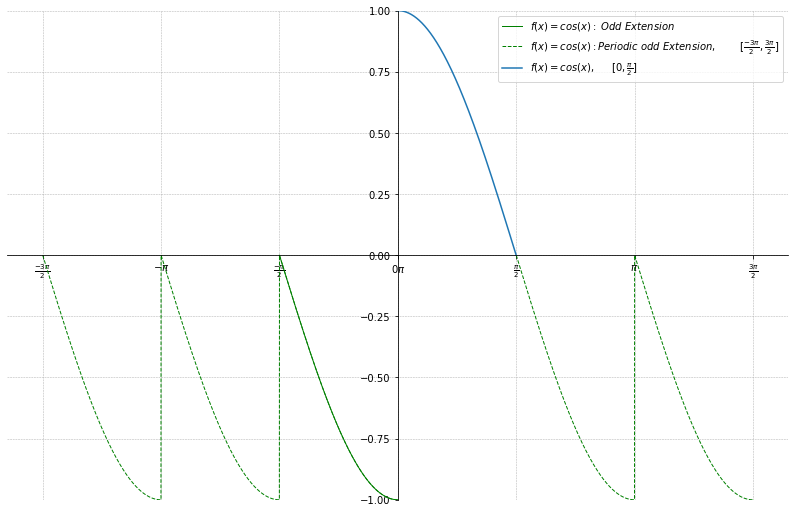

In [53]:

fig, ax = plt.subplots(ncols=1, figsize=(14, 9))
ax.set_ylim((-1, 1.))
# ax.set_xlim((x_start, x_end))
ax.plot(xy_rot[:,0], xy_rot[:,1], color='g',label=r'$f(x)=cos(x): \ Odd \  Extension$',  linewidth=1)


ax.plot(x_extension_1,y_extension_1, color='g',label=r'$f(x)=cos(x): Periodic \ odd \  Extension, \ \ \ \ \ \ \  [\frac{-3 \pi}{2}, \frac{3\pi}{2}]$',  linewidth=1, linestyle=linestyles[1])
ax.plot(x_extension_2,y_extension_2, color='g',  linewidth=1, linestyle=linestyles[1])

ax.plot(x_domain, f_1_return, label=r'$f(x)=cos(x), \ \ \ \ \ [0, \frac{\pi}{2}]$', linestyle=linestyles[0])

# for i, number_of_coeff in enumerate(coefficients_to_plot):
    
#     n = np.arange(1,number_of_coeff + 1, 1, dtype=np.int32)
#     a = vector_a(n)  #  terms are generated
#     b = vector_b(n)
#     y_estimates = fourier(a, b, x_domain,interval_length ,a_0)

#     ax.plot(x_domain, y_estimates, color=colors[i], linewidth=1.5, linestyle=linestyles[i+1],label=f'Fourier Series Approximation:\n $f(x)$ with {number_of_coeff} terms'  )

ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.spines['left']
ax.spines['bottom']


ax.legend(loc=0)
ax.grid(linestyle='--', linewidth=0.5)
x_tick = np.linspace(-3*pi/2, 3*pi/2, 7)
ax.set_xticks(x_tick)

ax.set_xticklabels([r'$\frac{-3\pi}{2}$', r'$-\pi$',  r'$\frac{-\pi}{2}$',r'$0\pi$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$'])  


plt.savefig('HW6_Problem_2.pdf', bbox_inches="tight")
plt.show()